In [10]:
import numpy as np
import matplotlib.pyplot as plt

from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay
from ctapipe.utils import get_dataset_path
from ctapipe.io import EventSource
from ctapipe.calib import CameraCalibrator
from ctapipe.image.cleaning import tailcuts_clean
from ctapipe.image.hillas import hillas_parameters
from copy import deepcopy
import os
from ctapipe.io import read_table

In [9]:
filename = '/Users/thomasvuillaume/Work/CTA/Data/LST1/20200218/v0.6.1_v05/dl1_LST-1.Run02011.0000.h5'

In [12]:
import tables

In [23]:
tab = tables.open_file(filename)

In [26]:
tab.root.configuration.instrument.telescope.camera.geometry_LSTCam

/configuration/instrument/telescope/camera/geometry_LSTCam (Table(1855,)) ''
  description := {
  "pix_id": Int64Col(shape=(), dflt=0, pos=0),
  "pix_x": Float64Col(shape=(), dflt=0.0, pos=1),
  "pix_y": Float64Col(shape=(), dflt=0.0, pos=2),
  "pix_area": Float64Col(shape=(), dflt=0.0, pos=3)}
  byteorder := 'little'
  chunkshape := (2048,)

In [19]:
tab.close()

In [29]:
geom_table.meta['PIX_TYPE']='hexa'

In [38]:
geom = CameraGeometry.from_name('LSTCam-002')

In [20]:
image_table = read_table(filename, path='/dl1/event/telescope/image/LST_LSTCam')

In [45]:
len(image_table)

53000

In [40]:
output_dir = 'lst1_images_v2'
os.makedirs(output_dir, exist_ok=True)

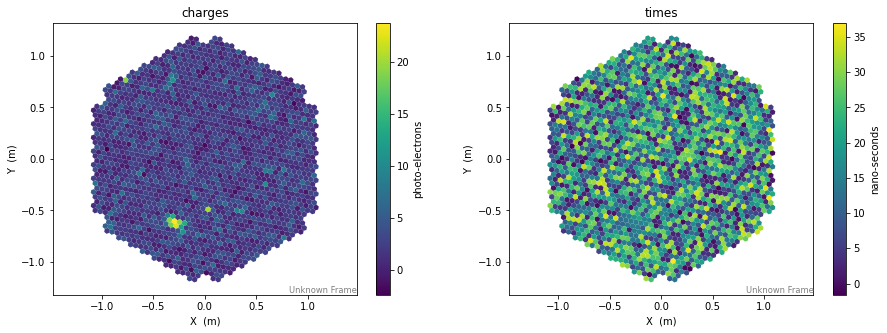

In [54]:
visible_axis = True

fig, axes = plt.subplots(1, 2, figsize=(15,5))

d0 = CameraDisplay(geom, ax=axes[0])
axes[0].set_title('charges')
d0.add_colorbar(ax=axes[0])
d0.colorbar.set_label('photo-electrons')

d1 = CameraDisplay(geom, ax=axes[1])
axes[1].set_title('times')
d1.add_colorbar(ax=axes[1])
d1.colorbar.set_label('nano-seconds')

for ax in axes:
        ax.get_xaxis().set_visible(visible_axis)
        ax.get_yaxis().set_visible(visible_axis)
        if not visible_axis:
            ax.axis('off')
            ax.set_title('')

fig.patch.set_visible(visible_axis)

for ii, (image, pulse_time) in enumerate(image_table['image', 'peak_time'][:100]):

    d0.image = image
    d1.image = pulse_time
    
    plt.savefig(os.path.join(output_dir, f'event_{ii}.png'), dpi=200, transparent=True)
#     plt.show()